## The tech industry in Brazil, a comparison between women and men conditions in 2020.
Analysis of StackOverflow Annual Developer Survey of 2020, comparing the of women and men conditions.
I consider as "Man" only the columns of Gender "Man" and "Woman" the columns of Gender "Woman", not considering the other intersections as in columns of value 'Man;Non-binary, genderqueer, or gender non-conforming', 'Non-binary, genderqueer, or gender non-conforming','Woman;Man', 'Woman;Non-binary, genderqueer, or gender non-conforming'. 


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


## Load the datasets of StackOverflow Survey from 2015 to 2020.


In [471]:
## Change the dataset to the folder where the datasets are stored

dataset_path = "../datasets"

df_2020_results = pd.read_csv(f"{dataset_path}/developer_survey_2020/survey_results_public.csv")
df_2019_results = pd.read_csv(f"{dataset_path}/developer_survey_2019/survey_results_public.csv")
df_2018_results = pd.read_csv(f"{dataset_path}/developer_survey_2018/survey_results_public.csv")
df_2018_results = pd.read_csv(f"{dataset_path}/developer_survey_2018/survey_results_public.csv")
df_2017_results = pd.read_csv(f"{dataset_path}/developer_survey_2017/survey_results_public.csv")
df_2016_results = pd.read_csv(f"{dataset_path}/2016_Stack_Overflow_Survey_Results/2016_Stack_Overflow_Survey_Responses.csv")
df_2015_results = pd.read_csv(f"{dataset_path}/2015_Stack_Overflow_Developer_Survey_Responses/2015_Stack_Overflow_Developer_Survey_Responses.csv")

## There are two formats of survey dataset.
Since there are two formats of dataset, with distinct columns, I separated them in diferent lists

In [472]:
datasets_format1 = [df_2017_results, df_2018_results, df_2019_results, df_2020_results] 
datasets_format2 = [df_2015_results, df_2016_results]

## Filter for data from Brazil
Since our questions will be focused in Brazil audience, I filtered the columns of "Country"

In [473]:
df_2015_results = df_2015_results[df_2015_results["Country"]=="Brazil"]
df_2016_results = df_2016_results[df_2016_results["country"]=="Brazil"]
df_2017_results = df_2017_results[df_2017_results["Country"]=="Brazil"]
df_2018_results = df_2018_results[df_2018_results["Country"]=="Brazil"]
df_2019_results = df_2019_results[df_2019_results["Country"]=="Brazil"]
df_2020_results = df_2020_results[df_2020_results["Country"]=="Brazil"]

 Clean the lines where gender is missing

In [474]:
for dataset in datasets_format1:
    dataset.dropna(subset=["Gender"], inplace = True)

df_2015_results.dropna(subset=["Gender"], inplace = True)
df_2016_results.dropna(subset=["gender"], inplace = True)


In [475]:

def store_percentage_of_man_woman(man_woman, total, quantity_of_man_women, year):
    '''Calculate and store the percentage of man and woman that answered
    the survey by year'''

    if "Female" in man_woman:     
        quantity_of_man_women[year] = {"Woman": man_woman["Female"]/total}
    if "Woman" in man_woman:
        quantity_of_man_women[year] = {"Woman": man_woman["Woman"]/total}
    return quantity_of_man_women

#initialize the dictionary 
quantity_of_man_women = dict()

#fill the dictionary with data of 2015's Survey
man_woman_2015 = df_2015_results["Gender"].value_counts()
total_2015 = df_2015_results.shape[0]
quantity_of_man_women = store_percentage_of_man_woman(man_woman_2015,total_2015, quantity_of_man_women,2015)

#fill the dictionary with data of 2016's Survey
man_woman_2016 = df_2016_results["gender"].value_counts()
total_2016 = df_2016_results.shape[0]
quantity_of_man_women = store_percentage_of_man_woman(man_woman_2016,total_2016, quantity_of_man_women, 2016)

#fill the dictionary with data of 2017, 2018, 2019, 2020's Survey
for dataset, year in zip(datasets_format1, [2017,2018,2019,2020]):
    man_woman = dataset[["Respondent", "Gender"]]["Gender"].value_counts().iloc[:2]
    total = dataset.shape[0]
    quantity_of_man_women = store_percentage_of_man_woman(man_woman,total,quantity_of_man_women, year)



In [480]:
print("Total of respondents",df_2020_results.shape[0])
print("Qty of women",df_2020_results[df_2020_results["Gender"]=="Woman"].shape[0])
print("Qty of men", df_2020_results[df_2020_results["Gender"]=="Man"].shape[0])

Total of respondents 1818
Qty of women 77
Qty of men 1362


In [349]:
#make a dataset with data of female respondesnts
data_processed = pd.DataFrame(quantity_of_man_women)

### Is the number of women who are in IT increasing along the last 5 years in Brazil?
By the histogram, we can see that the percentage of woman participating in survey in Brazil had a big increase since 2015.

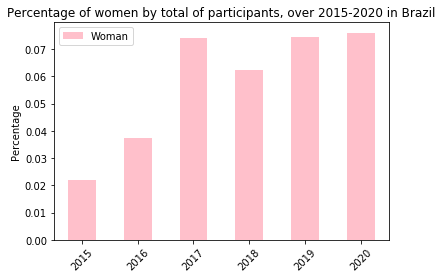

In [455]:
data_processed.T.plot.bar(rot=45, color="pink");
plt.title("Percentage of women by total of participants, over 2015-2020 in Brazil");
plt.ylabel("Percentage");

## Is there an equality of salary between women and men in this year of 2020?

In [351]:
df_2020_results[["ConvertedComp","Gender"]].groupby("Gender").mean();

### Salary is in ConvertedComp column, which specifies the equivalent in dollar of the compensation especified. I am not interested in rows with missing Gender or Salary, neither in values of "NA" (Not Answered)

In [352]:
df_2020_salary_cleaned = df_2020_results[["ConvertedComp","Gender"]].dropna()
mask = df_2020_salary_cleaned['ConvertedComp'].isin(["NA"])
df_2020_salary_cleaned = df_2020_salary_cleaned[~mask]


### By the boxplots, we can see that the median of salary of women in Brazil is smaller than the median of man's salary in the same country.
Boxplot are a good way to visualize how the data is distributed. The median is not impacted by outliers, and the size of percentiles show the distribution of the column in analysis.

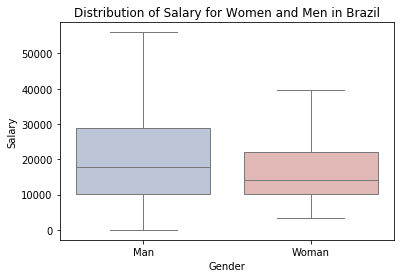

In [450]:
woman_salary = df_2020_salary_cleaned[df_2020_salary_cleaned["Gender"].isin(["Woman","Man"]) ]
ax = sns.boxplot(x="Gender", y="ConvertedComp", data=woman_salary, showfliers=False , palette="vlag",linewidth=1, saturation=10 )
plt.ylabel("Salary");
plt.title("Distribution of Salary for Women and Men in Brazil");




### Also, it is possible to see, in the distribution chart, that there are more women with small salaries than men, and that men has bigger salary than women


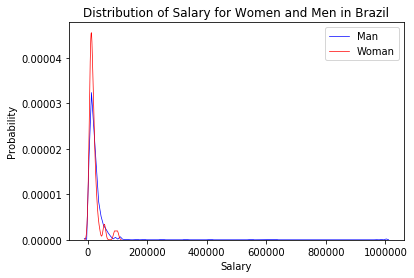

In [467]:
ax = sns.distplot(woman_salary[woman_salary["Gender"]=="Man"]["ConvertedComp"], color="blue",hist=False, kde_kws=dict(linewidth=0.7),label="Man" )
sns.distplot(woman_salary[woman_salary["Gender"]=="Woman"]["ConvertedComp"], color="red",hist=False, kde_kws=dict(linewidth=0.7), label="Woman", ax=ax)
plt.ylabel("Probability");
plt.xlabel("Salary");

plt.title("Distribution of Salary for Women and Men in Brazil");



### Are The Job Satisfaction of women and men the same in Brazil?

The job satisfaction data is in column JobSat column. Since I want to see the real data answered, to not introduce bias into data, I droped the rows where the values of JobSat and Gender was missing. 

In [355]:
df_2020_job_sat_cleaned = df_2020_results[["JobSat","Gender"]].dropna()
woman_job_sat = df_2020_job_sat_cleaned[df_2020_job_sat_cleaned["Gender"].isin(["Woman","Man"]) ]

The Job Satisfaction has the following categorical values: 'Very satisfied', 'Slightly dissatisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Very dissatisfied'.
I cleaned the data in order to consider only the JobSat with the categorical values above

In [356]:
set_job = list(set(df_2020_results["JobSat"]))
woman_job_sat = df_2020_job_sat_cleaned[df_2020_job_sat_cleaned["JobSat"].isin(list(set_job))]

In [357]:
# to see quantity of men and women who answered each of the job satisfaction categories, I processed the data in the dict "job_sat_dict"

from collections import defaultdict
job_sat_dict = defaultdict()
job_sat_dict =job_sat_dict.fromkeys(set_job[1:])
for key in job_sat_dict:
    job_sat_dict[key] = {"Man": 0, "Woman":0}

for index, row in woman_job_sat.iterrows():
    if row["Gender"]=="Man":
        job_sat_dict[row["JobSat"]]["Man"]=job_sat_dict[row["JobSat"]]["Man"]+1
    if row["Gender"] == "Woman":
        job_sat_dict[row["JobSat"]]["Woman"]=job_sat_dict[row["JobSat"]]["Woman"]+1


### After cleaning the data, the number of men who answered the survey is 1141 and the number of women 60, which is very disproportional and could lead to a misconception of less women in each of the categories.

So it makes sense to consider the percentage of the job satisfaction of woman by the total of woman participating 

In [362]:
number_man = woman_job_sat[woman_job_sat["Gender"]=="Man"].shape[0]
number_woman = woman_job_sat[woman_job_sat["Gender"]=="Woman"].shape[0]

for key, value in job_sat_dict.items():
    job_sat_dict[key]["Man"]= job_sat_dict[key]["Man"]/number_man *100
    job_sat_dict[key]["Woman"]= job_sat_dict[key]["Woman"]/number_woman * 100

In [363]:
pd.DataFrame(job_sat_dict)

,Very satisfied,Slightly dissatisfied,Slightly satisfied,Neither satisfied nor dissatisfied,Very dissatisfied
Man,26.643295,18.054338,31.113059,13.847502,10.341805
Woman,20.000000,20.000000,23.333333,26.666667,10.000000


### By this pie plot it is possible to see that, in Brazil, there are less women with high job satisfactions, and more women less satisfied with their jobs in IT.

Pie plot is suitable when we want to show proportions through the surface areas.  

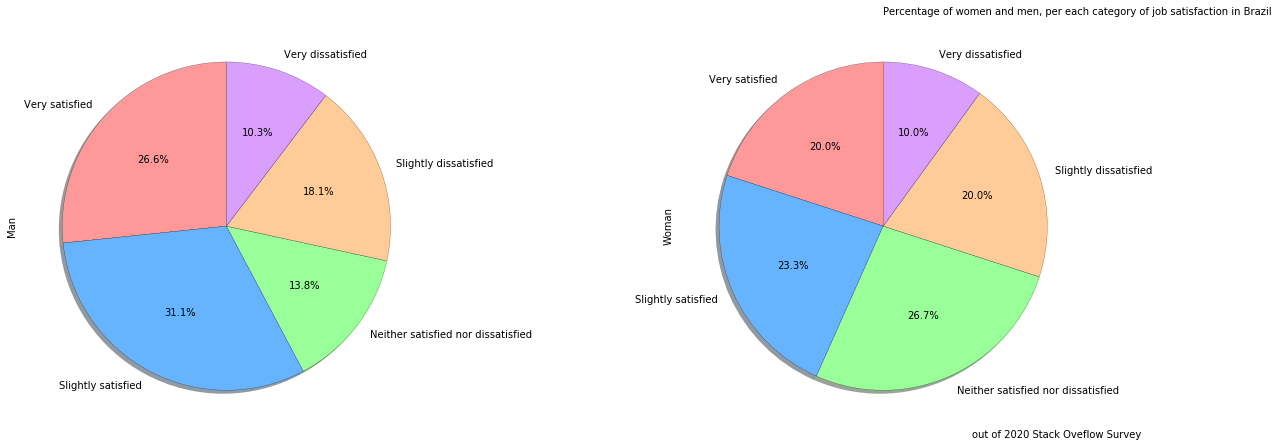

In [452]:
pd.DataFrame(job_sat_dict)[['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied','Slightly dissatisfied' ,  'Very dissatisfied']].T.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(18,6),legend=False, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#da9ffc'], shadow=True, wedgeprops = { 'linewidth': 0.2, "edgecolor" :"k" }, startangle=90);
plt.tight_layout()
plt.gcf().text(0.95,0.01,"out of 2020 Stack Oveflow Survey", ha="right");
title = plt.title("Percentage of women and men, per each category of job satisfaction in Brazil", fontsize=10);
title.set_ha("left");

### We can see the same information explained above in the bar plot

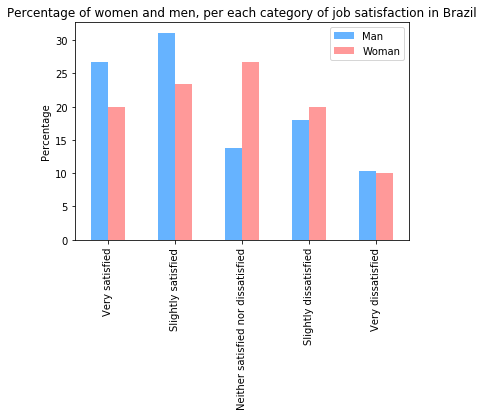

In [460]:
pd.DataFrame(job_sat_dict)[['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied','Slightly dissatisfied' ,  'Very dissatisfied']].T.plot.bar(colors=['#66b3ff', '#ff9999']);
plt.ylabel("Percentage");
plt.title("Percentage of women and men, per each category of job satisfaction in Brazil");